In [1]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import sklearn
import cv2
#import sys
import random
import tensorflow as tf
from tensorflow import keras
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [14]:
# define the image size and image path
IMG_WIDTH=128
IMG_HEIGHT=128
img_train_folder=r'dataset\pictures\train\128x128'
img_test_folder=r'dataset\pictures\test\128x128'

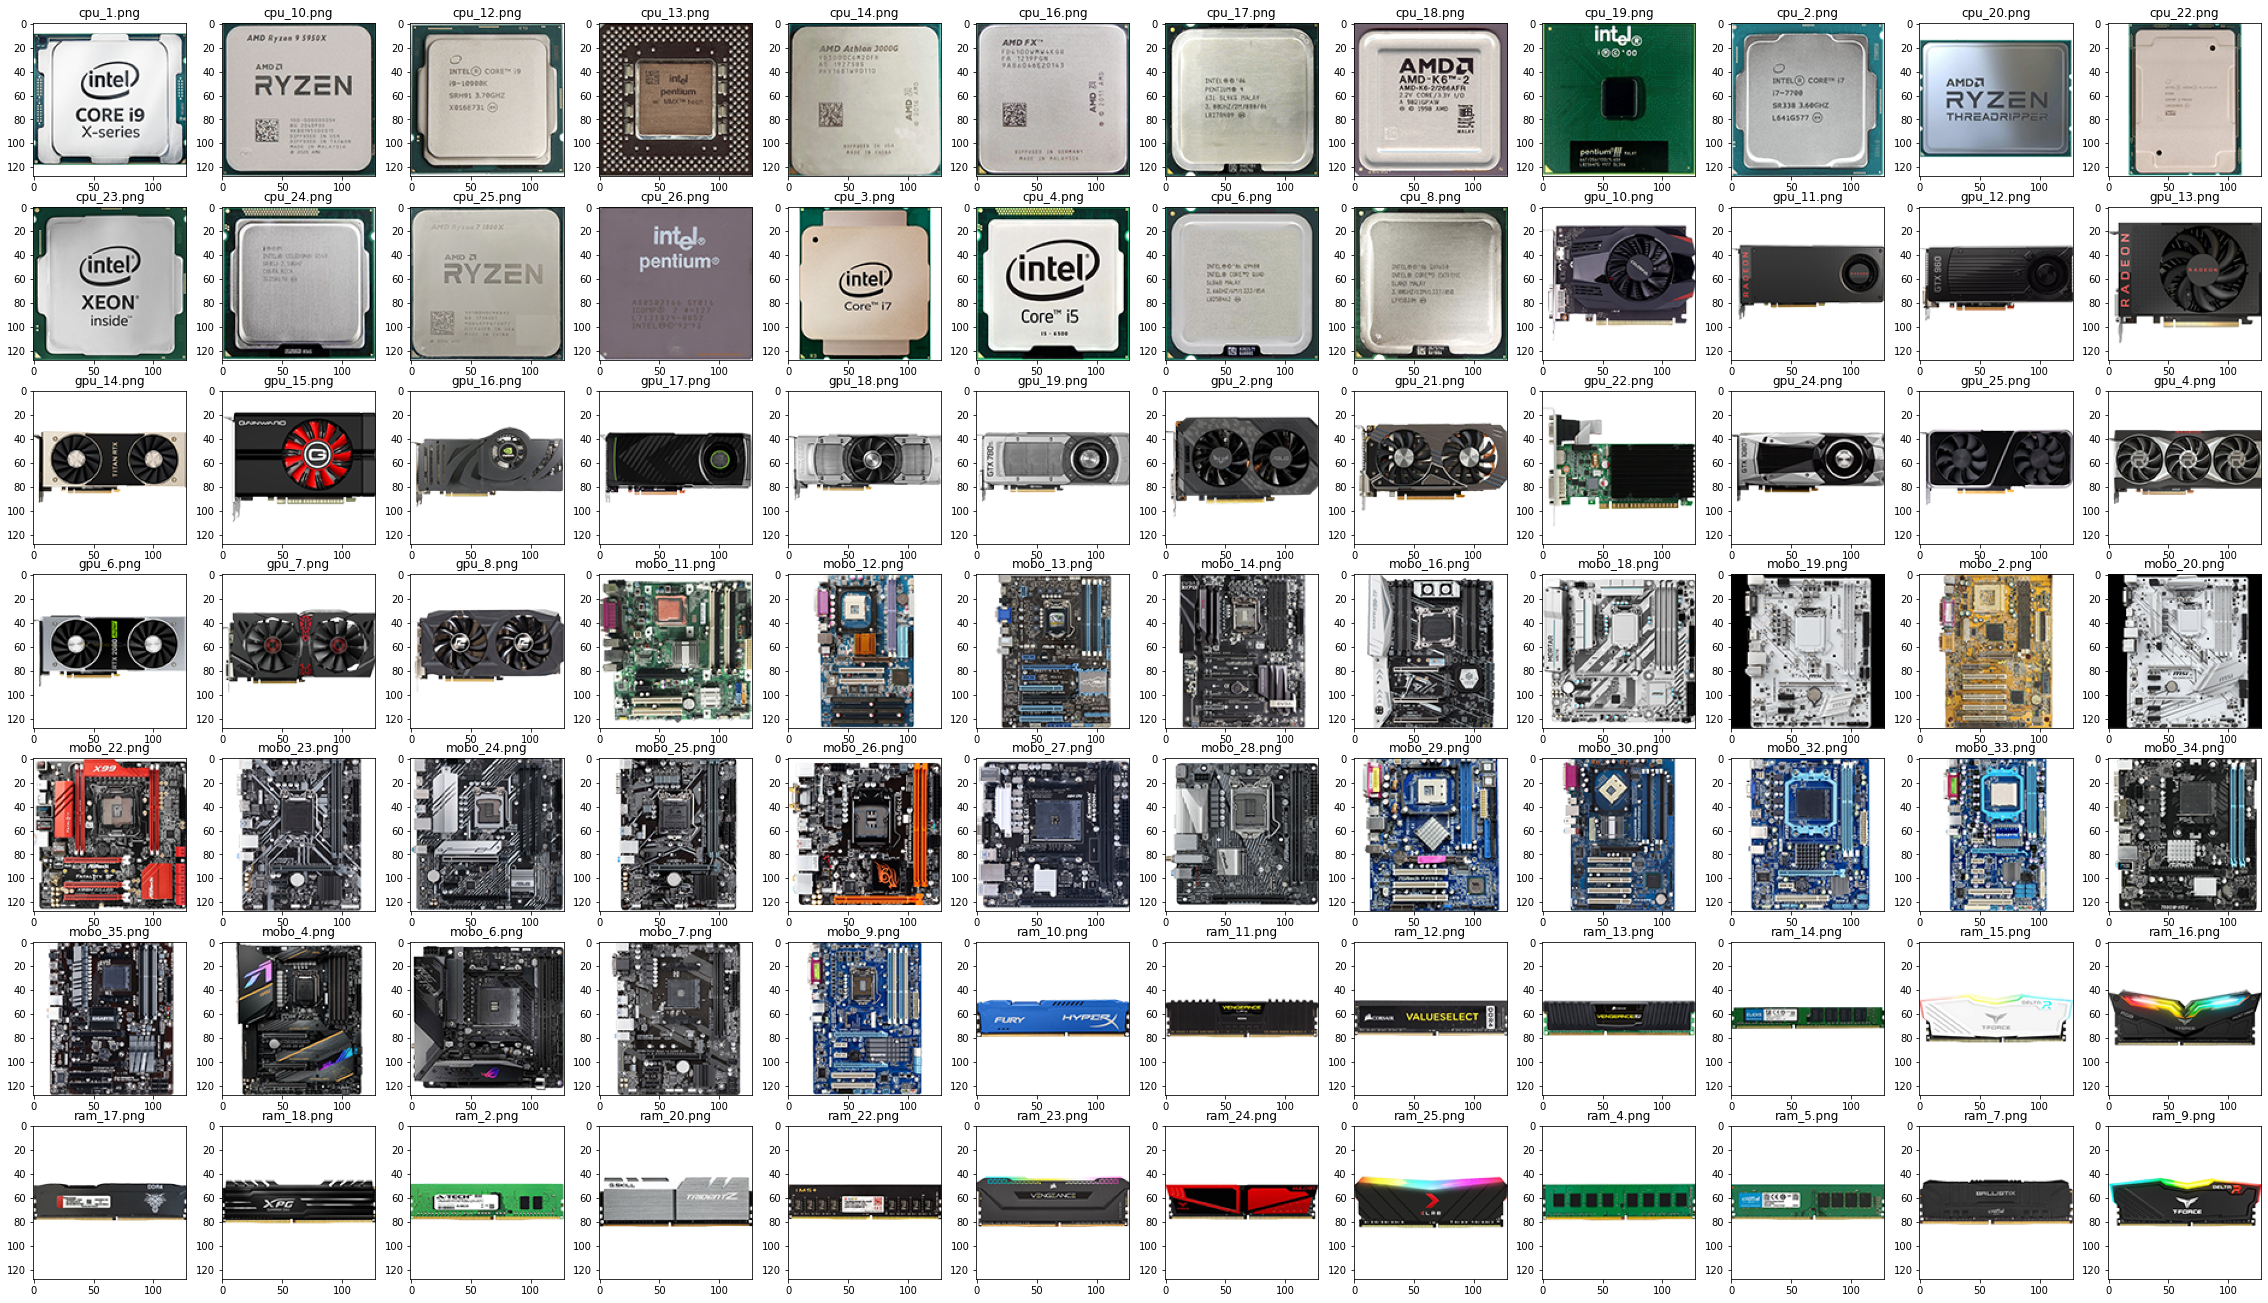

In [20]:
######################################################
# auxiliary code to visualize all pictures of dataset
######################################################
plt.figure(figsize=(40,40))
j = 0

for dir1 in os.listdir(img_train_folder):
    for file in os.listdir(os.path.join(img_train_folder, dir1)):
        image_path= os.path.join(img_train_folder, dir1)
        image_path2= os.path.join(image_path, file)    
        img=mpimg.imread(image_path2)
        ax=plt.subplot(12,12,j+1)
        ax.title.set_text(file)
        plt.imshow(img)
        j+=1
######################################################

In [63]:
# function to gather pictures and generate a numpy array
def create_dataset(img_folder):
   
    img_data_array = []
    class_name = []
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path = os.path.join(img_folder, dir1, file)
            image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(int(dir1))
    return img_data_array, class_name

In [64]:
# dataset import
X_array1, y_array1 = create_dataset(img_train_folder)
X_array2, y_array2 = create_dataset(img_test_folder)
X_train = np.array(X_array1)
y_train = np.array(y_array1)
X_test = np.array(X_array2)
y_test = np.array(y_array2)
print('treinamento completo:', X_train.shape)
print('testes:              ', X_test.shape)

treinamento completo: (84, 128, 128, 3)
testes:               (27, 128, 128, 3)


In [36]:
# separação dos dados de treinamento e validação
X_valid, X_train = X_train[:10], X_train[10:]
y_valid, y_train = y_train[:10], y_train[10:]
print('treinamento:', X_train.shape)
print('validação:   ', X_valid.shape)

treinamento: (74, 128, 128, 3)
validação:    (10, 128, 128, 3)


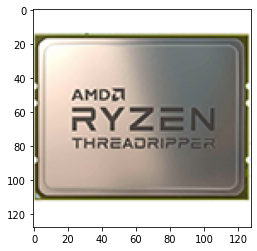

In [37]:
plt.imshow(X_train[0], cmap='binary')
plt.show()

In [39]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [38]:
# enumerate the classes found
class_names = ['cpu', 'gpu', 'mobo', 'ram']
class_names[y_train[0]]

'cpu'

In [40]:
###################################################################
# auxiliary code to visualize the array generated from the pictures
###################################################################
#np.set_printoptions(threshold=sys.maxsize)
print(X_train)
###################################################################

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1. 

In [41]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [110]:
# build the neural network layers
keras.backend.clear_session() # clears the session
np.random.seed(42) # random seed, but fixed
tf.random.set_seed(42) # random seed, but fixed

model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[128, 128, 3]),
            keras.layers.Dense(300, activation='relu'),
            keras.layers.Dense(100, activation='relu'),
            keras.layers.Dense(10, activation='softmax')
        ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 300)               14745900  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 14,777,010
Trainable params: 14,777,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.keras.utils.plot_model(model, 'pc_hardware_model.png', show_shapes=True)

In [ ]:
# acesso a cada uma das camadas
model.layers

In [ ]:
# primeira camada e respectivo nome
hidden1 = model.layers[1]
hidden1.name

In [ ]:
# encontra camada pelo nome
model.get_layer(hidden1.name)

In [ ]:
# indica se a camada é ou não oculta
model.get_layer(hidden1.name) is hidden1

In [ ]:
# obtém pesos e vieses da camada
weights, biases = hidden1.get_weights()
print('weights:', weights.shape)
print('biases: ', biases.shape)

In [ ]:
weights

In [ ]:
biases

In [111]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [112]:
# esta chamada pode demorar um pouco
%time history = model.fit(X_train, y_train, epochs=80, validation_data=(X_valid, y_valid))

Epoch 1/80
3/3 [==============================] - 1s 263ms/step - loss: 5.3033 - accuracy: 0.1786 - val_loss: 25.0163 - val_accuracy: 0.0000e+00
Epoch 2/80
3/3 [==============================] - 0s 63ms/step - loss: 9.6567 - accuracy: 0.3810 - val_loss: 1.2319 - val_accuracy: 0.9000
Epoch 3/80
3/3 [==============================] - 0s 95ms/step - loss: 1.8689 - accuracy: 0.4286 - val_loss: 4.6749 - val_accuracy: 0.0000e+00
Epoch 4/80
3/3 [==============================] - 0s 62ms/step - loss: 2.7851 - accuracy: 0.3333 - val_loss: 1.2917 - val_accuracy: 0.9000
Epoch 5/80
3/3 [==============================] - 0s 66ms/step - loss: 1.4031 - accuracy: 0.3810 - val_loss: 1.2107 - val_accuracy: 0.9000
Epoch 6/80
3/3 [==============================] - 0s 61ms/step - loss: 1.4331 - accuracy: 0.5833 - val_loss: 1.5131 - val_accuracy: 0.0000e+00
Epoch 7/80
3/3 [==============================] - 0s 66ms/step - loss: 0.9546 - accuracy: 0.6429 - val_loss: 0.8979 - val_accuracy: 0.9000
Epoch 8/80
3/

In [113]:
# os dados do treinamento estão disponíveis no histórico retornado
print('parâmetros:', history.params)
print('métricas:  ', list(history.history.keys()))
print('épocas:    ', history.epoch)

parâmetros: {'verbose': 1, 'epochs': 80, 'steps': 3}
métricas:   ['loss', 'accuracy', 'val_loss', 'val_accuracy']
épocas:     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]


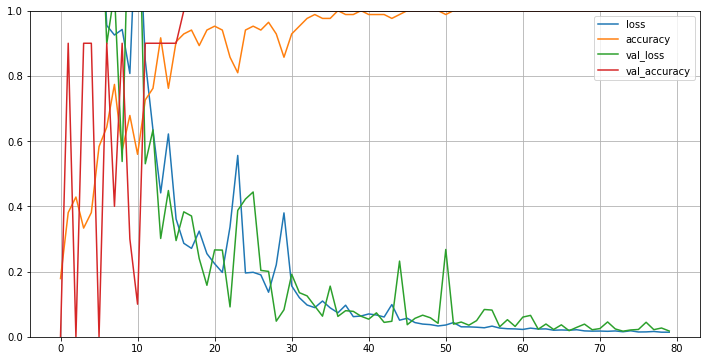

In [114]:
pd.DataFrame(history.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [115]:
# avaliação com conjunto de teste
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 52ms/step - loss: 0.1267 - accuracy: 0.9259


[0.12665089964866638, 0.9259259104728699]

In [121]:
# probabilidades computadas para três instâncias de teste
X_new = X_test[:20]
y_proba = model.predict(X_new)
print(y_proba.round(2))

[[0.99 0.   0.01 0.01 0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.99 0.   0.   0.01 0.   0.   0.   0.   0.   0.  ]
 [0.99 0.   0.01 0.   0.   0.   0.   0.   0.   0.  ]
 [0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.99 0.   0.01 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.29 0.   0.7  0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.26 0.   0.74 0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.99 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.09 0.   0.91 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.07 0.   0.92 0.01 0.   0.   0.   0.   0.  

In [123]:
# classes previstas e reais para as mesmas três instâncias de teste
y_pred = np.argmax(model.predict(X_new), axis=-1)
print('previstas: ', np.array(class_names)[y_pred])
print('reais:     ', np.array(class_names)[y_test[:20]])

previstas:  ['cpu' 'cpu' 'cpu' 'cpu' 'cpu' 'cpu' 'gpu' 'ram' 'gpu' 'ram' 'gpu' 'gpu'
 'mobo' 'mobo' 'mobo' 'mobo' 'mobo' 'mobo' 'mobo' 'mobo']
reais:      ['cpu' 'cpu' 'cpu' 'cpu' 'cpu' 'cpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu'
 'mobo' 'mobo' 'mobo' 'mobo' 'mobo' 'mobo' 'mobo' 'mobo']


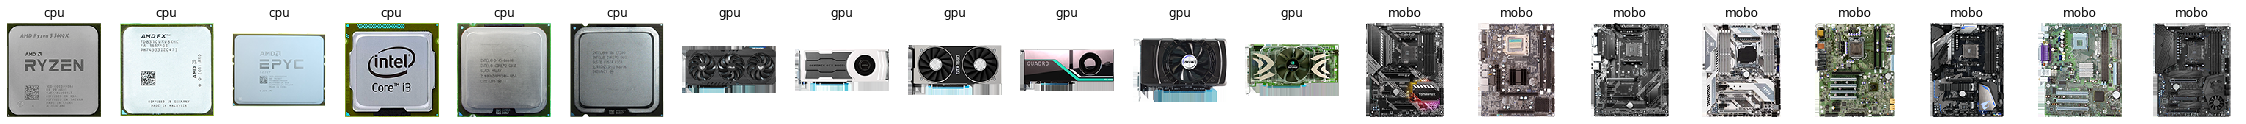

In [126]:
# visualização das tres instâncias
plt.figure(figsize=(40, 20))
for index, image in enumerate(X_new):
    plt.subplot(1, 20, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()